## PROYECTO FINAL PYTHON
### Eduardo Lopez Ayala  Carnet: 19000477

### En este proyecto se realizara un modelo manual y uno de Scikitlearn para validar cual crea la mejor aproximacion lineal de un conjunto de datos de caracteristicas de casas

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn import linear_model

### Primero se Cargan los datos y se generan unos indicadores estadisticos

In [375]:
data=np.load('proyecto_training_data.npy')
size = len(data)
#training dataset
tr = data[:int(0.80*size) ]
val=data[int(0.80*size) :]
##OverallQual=10 very excelent, 9 excelent, 8 very good, 7 good, 6 above average, 5 average...
##SalePrice, OverallQual, FirstFloorSF, TotRms, YearBuilt, LotFrontage


print(np.nanmean(tr,axis=0))
print(np.nanmin(tr,axis=0))
print(np.nanmax(tr,axis=0))
print(np.nanstd(tr,axis=0))
#tr.describe()
##graficar
sns.set


[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
[3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
[7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
[7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

### Se grafica cada variable x

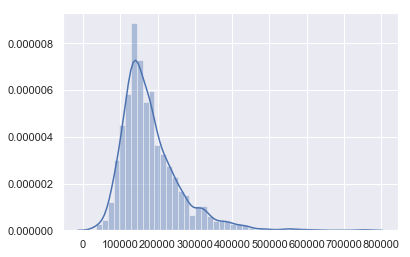

In [37]:
sns.distplot(tr[:,0])

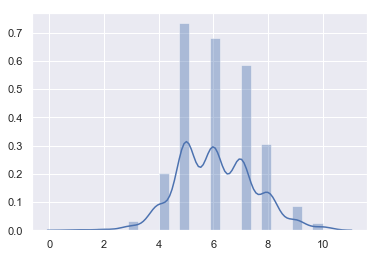

In [38]:
sns.distplot(tr[:,1])

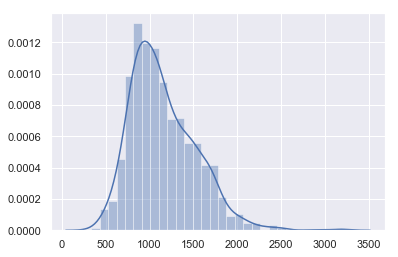

In [39]:
sns.distplot(tr[:,2])

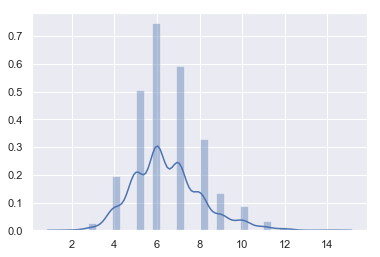

In [40]:
sns.distplot(tr[:,3])

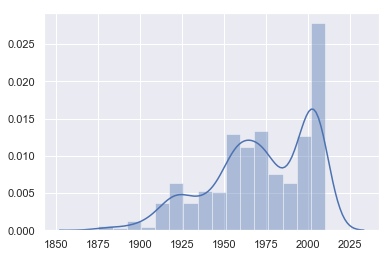

In [41]:
sns.distplot(tr[:,4])

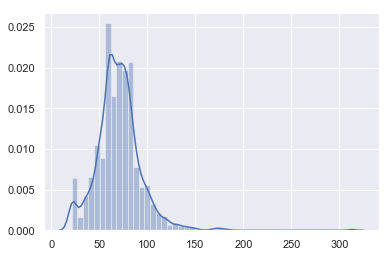

In [50]:
y=tr[:,5]
x = y[~np.isnan(y)]
sns.distplot(x)

### Se calcula el coeficiente de correlacion de cada variable independiente

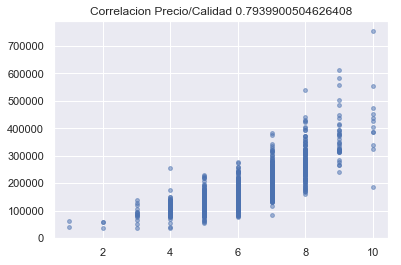

In [83]:
##calcular coeficiente de correlacion entre x e y
price=tr[:,0]
overallq=tr[:,1]
corr=np.corrcoef([overallq,price]) [1,0]
plt.scatter(overallq,price, s=15, alpha=0.5)
plt.title("Correlacion Precio/Calidad %s" % corr)
plt.show()

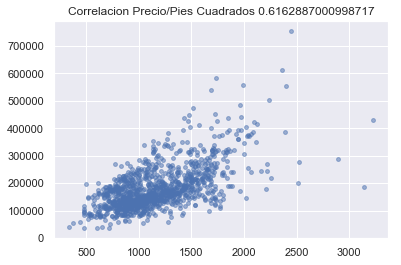

In [85]:
##calcular coeficiente de correlacion entre x e y
squarefeets=tr[:,2]
corr=np.corrcoef([price,squarefeets]) [1,0]
plt.scatter(squarefeets,price, s=15, alpha=0.5)
plt.title("Correlacion Precio/Pies Cuadrados %s" % corr)
plt.show()

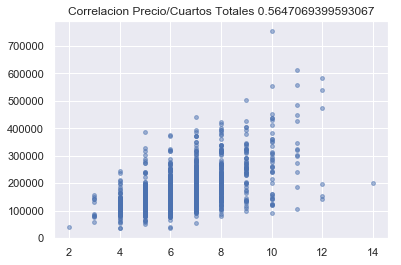

In [84]:
##calcular coeficiente de correlacion entre x e y
totalrooms=tr[:,3]
corr=np.corrcoef([price,totalrooms]) [1,0]
plt.scatter(totalrooms,price, s=15, alpha=0.5)
plt.title("Correlacion Precio/Cuartos Totales %s" % corr)
plt.show()

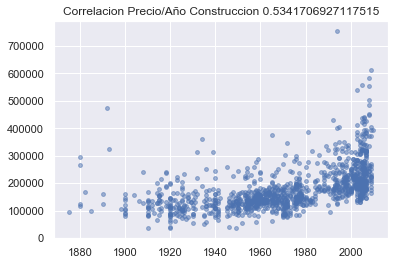

In [120]:
##calcular coeficiente de correlacion entre x e y
yearbuilt=tr[:,4]
corr=np.corrcoef([price,yearbuilt]) [1,0]
plt.scatter(yearbuilt, price, s=15, alpha=0.5)
plt.title("Correlacion Precio/Año Construccion %s" % corr)
plt.show()

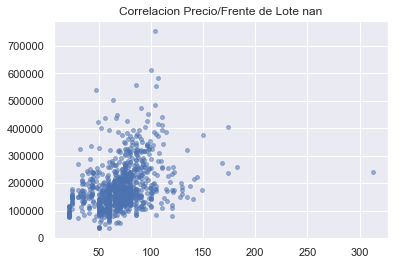

In [91]:
##calcular coeficiente de correlacion entre x e y
frentelote=tr[:,5]
corr=np.corrcoef([price,frentelote]) [1,0]
plt.scatter(frentelote, price, s=15, alpha=0.5)
plt.title("Correlacion Precio/Frente de Lote %s" % corr)
plt.show()

### Se crea la funcion de iteracion manual para encontrar m y b

In [ ]:
##funcion de entrenamiento de regresion lineal de una variable
def trainer(x, y, epochs, imprimir_error_cada, lr):
    xmat=np.reshape(x, (-1, 1))
    mat = np.hstack((xmat, np.ones((xmat.shape[0], 1), dtype=xmat.dtype)))
    #inicializamos parametros
    global m
    global b
    m=-0.1
    b=0
    error=0
    err_array=([])
    mod=np.empty((epochs,3), dtype=xmat.dtype)

    dictmodel = {}
    for i in range(1,epochs):
        par=np.array([m,b]) #parametros en forma de array        
        yhat=np.matmul(mat,par)
        error=(0.5)*np.mean((y-yhat)**2) #vector para calcular promedio y error
        if ((i%imprimir_error_cada)==0):
            print('error:' , error)
        err_array = np.append(err_array, [error])        
        gradm= np.mean((yhat-y)*mat[:,0])
        gradb= np.mean((yhat-y)*1)

        m=m-(lr*gradm)
        b=b-(lr*gradb)
        #creamos un diccionario con los valores del modelo
        dictmodel[i] = error
        #creamos la matriz del modelo que estamos entrenando
        
        mod[i-1] = ([y[i-1],x[i-1],yhat[i-1]])

    return dictmodel,mod

### La siguiente funcion permite visualizar los puntos de una muestra de n y tambien se grafica el resultado del error de la funcion de entrenamiento llamada trainer

In [311]:
def visualizamod(mod, n):
    a=np.array([0,0])
    for i in range(1,mod.shape[0]):
       if ((i%n)==0):
          plt.scatter(mod[i,1],mod[i,0])          
    #plt.plot(mod[:,1],mod[:,1]*m +b,"b-", linewidth=3)       
    print(a)
    plt.title('Visualizacion Iteraciones')
    plt.show()

    

error: 10022905818.197395
error: 5202316296.274499
error: 3074689916.6883526
error: 2135562982.368204
error: 1720962765.4889705
error: 1537854755.3129468
error: 1456912518.7983956
error: 1421059753.702625
error: 1405106680.879162
[0 0]


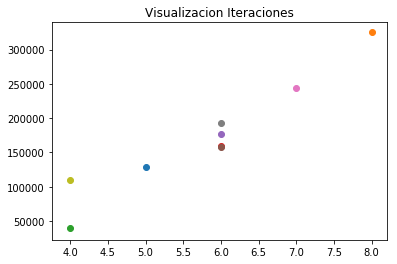

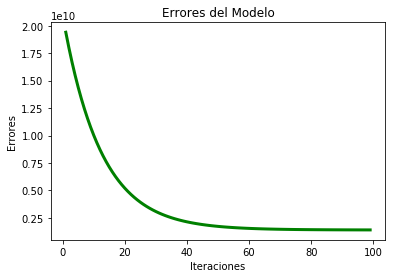

In [312]:
x1=tr[:,1]
y1=tr[:,0]
m=0
b=0
result,mod1=trainer(x1, y1, 100, 10, 0.001)
visualizamod(mod1,10)


plt.plot(result.keys(),result.values(),"g-", linewidth=3)
plt.ylabel('Errores')
plt.xlabel('Iteraciones')
plt.title('Errores del Modelo')
plt.show()


### Entrenamientos con las dos variables escogidas  x=1 calidad y x=3 total rooms

error: 1886119079.7317915
error: 2398823711.5020013


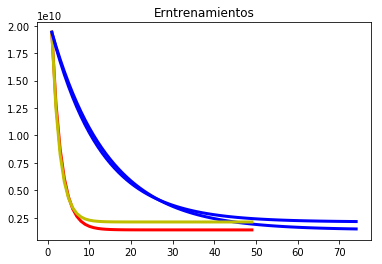

In [335]:
##graficas para entrenar los modelos

#variable 1
x1=tr[:,1]
y1=tr[:,0]

result,mod1=trainer(x1, y1, 50, 50, 0.005)
plt.plot(result.keys(),result.values(),"r-", linewidth=3)

result,mod1=trainer(x1, y1, 75, 50, 0.0009)
plt.plot(result.keys(),result.values(),"b-", linewidth=3)


#variable 2
x1=tr[:,3]
y1=tr[:,0]

result,mod1=trainer(x1, y1, 50, 50, 0.005)
plt.plot(result.keys(),result.values(),"y-", linewidth=3)

result,mod1=trainer(x1, y1, 75, 50, 0.0009)
plt.plot(result.keys(),result.values(),"b-", linewidth=3)

plt.title('Erntrenamientos')
plt.show()

## Comparación con modelo Scikitlearn

### Se crea una funcion modelo_scikit que genera la regresion lineal y luego otra funcion llamada compara llama a la de scikit y la manual (trainer)

In [347]:

x1=np.reshape(tr[:,1],(-1, 1))
y1=np.reshape(tr[:,0],(-1, 1))

#objeto de scikitlearn para regresion lineal
rl = linear_model.LinearRegression()
 
#entrenamiento
rl.fit(x1, y1)
y_scikit = rl.predict(x1)
print('m_scikit:', rl.coef_)
print('b_scikit:', rl.intercept_)

def modelo_scikit(x,y):
    x1=np.reshape(x,(-1, 1))
    y1=np.reshape(y,(-1, 1))
    rl = linear_model.LinearRegression()
    rl.fit(x1, y1)
    return rl.predict(x1)


m_scikit: [[45411.99877916]]
b_scikit: [-96469.57131874]


In [355]:

def compara(modelo_scikit, trainer,xprim, yprim,ep,it,lr):
     msci=modelo_scikit(xprim,yprim) #vector scikitlearn
     mman,mod=trainer(xprim, yprim,ep,it,lr) #vector manual
     dictvalues = [float(x) for x in list(mman.values())]
     comb=(msci+dictvalues)/2 #vector promedio de los dos
     
     return msci, dictvalues,comb

##llamamos a la funcion compara para ver los 3 vectores
compara(modelo_scikit,trainer,tr[:,1],tr[:,0],100,10,0.001)




error: 10022905818.197395
error: 5202316296.274499
error: 3074689916.6883526
error: 2135562982.368204
error: 1720962765.4889705
error: 1537854755.3129468
error: 1456912518.7983956
error: 1421059753.702625
error: 1405106680.879162


(array([[221414.42013537],
        [176002.42135622],
        [221414.42013537],
        ...,
        [221414.42013537],
        [266826.41891453],
        [176002.42135622]]),
 [19409840848.184727,
  17994927531.013763,
  16691138567.865137,
  15489746338.291647,
  14382708682.390366,
  13362615065.262852,
  12422636969.676947,
  11556482184.85043,
  10758352685.358198,
  10022905818.197395,
  9345218538.19038,
  8720754452.311419,
  8145333452.3263855,
  7615103732.461451,
  7126516004.782324,
  6676299739.677654,
  6261441272.396448,
  5879163629.081051,
  5526907937.247863,
  5202316296.274499,
  4903215993.225601,
  4627604958.355453,
  4373638362.924153,
  4139616269.610905,
  3923972252.854284,
  3725262912.942153,
  3542158213.6568313,
  3373432578.794111,
  3217956687.9547906,
  3074689916.6883526,
  2942673370.3819156,
  2821023465.2621503,
  2708926013.540309,
  2605630773.1054053,
  2510446425.2802415,
  2422735947.0206075,
  2341912346.5783434,
  2267434734.082144,
  21988

## Ahora con los datos de validacion estimamos el error respecto y real

error: 10380201719.196093
error: 5457409092.354413
error: 3283038316.060039
error: 2322554044.0090737
error: 1898203135.7159097
error: 1710644607.828289
error: 1627669520.229621
error: 1590885588.3985403
error: 1574502885.4333508
error: 1567130859.665432
error: 1563738683.7603374
error: 1562104408.7518153
error: 1561246673.672907
error: 1560732043.9466357
error: 1560369085.8287764
error: 1560073249.280949
error: 1559807191.2370083
error: 1559554418.377903
error: 1559307646.0234027
error: 1559063656.6423962
error: 1558821029.028168
error: 1558579135.3507764
error: 1558337698.1884944
error: 1558096594.8833609
error: 1557855771.1315386
error: 1557615202.8190613
error: 1557374879.1659467
error: 1557134795.2815185
error: 1556894948.8763368


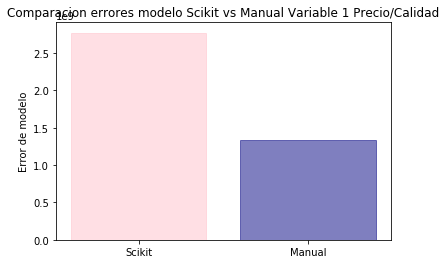

error: 9893293642.225676
error: 5463711670.165092
error: 3806055027.4321
error: 3185694789.567426
error: 2953506593.033684
error: 2866578289.0381894
error: 2834008479.6852612
error: 2821780487.7979326
error: 2817164758.538669
error: 2815397700.016943
error: 2814696704.0873356
error: 2814394691.7812557
error: 2814242032.010035
error: 2814145308.991711
error: 2814069565.073441
error: 2814001718.517998
error: 2813936873.8865066
error: 2813873199.176742
error: 2813810008.770844
error: 2813747046.045376
error: 2813684214.9131627
error: 2813621479.3621902
error: 2813558825.8615413
error: 2813496249.29313
error: 2813433747.6871448
error: 2813371320.2519684
error: 2813308966.6369452
error: 2813246686.656503
error: 2813184480.186905


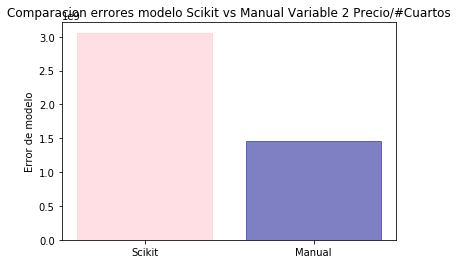

In [374]:
##lvalidacion con variable 1
msci,mman,comb=compara(modelo_scikit,trainer,val[:,1],val[:,0],293,10,0.001)
mn1=np.reshape(mman, (-1, 1))
yreal=np.reshape(val[:,0], (-1,1))
#msci=modelo de scikit, mn1=modelo manual, yreal=yreal del precio
a=np.hstack((np.hstack((msci,mn1)),yreal))

#graficamos los errores variable 1
objects = ('Scikit', 'Manual')
y_pos = np.arange(2)
values = [np.sum(a[0]-a[2]),np.sum(a[1]-a[2])] 
barras=plt.bar(y_pos, values, align='center', alpha=0.5)
barras[0].set_color('pink')
barras[1].set_color('navy')
plt.xticks(y_pos, objects)
plt.ylabel('Error de modelo')
plt.title('Comparacion errores modelo Scikit vs Manual Variable 1 Precio/Calidad')
plt.show()



#ahora lo hacemos para la variable 2
msci,mman,comb=compara(modelo_scikit,trainer,val[:,3],val[:,0],293,10,0.001)
mn1=np.reshape(mman, (-1, 1))
yreal=np.reshape(val[:,0], (-1,1))
#msci=modelo de scikit, mn1=modelo manual, yreal=yreal del precio
a=np.hstack((np.hstack((msci,mn1)),yreal))

#graficamos los errores variable 1
objects = ('Scikit', 'Manual')
y_pos = np.arange(2)
values = [np.sum(a[0]-a[2]),np.sum(a[1]-a[2])] 
barras=plt.bar(y_pos, values, align='center', alpha=0.5)
barras[0].set_color('pink')
barras[1].set_color('darkblue')
plt.xticks(y_pos, objects)
plt.ylabel('Error de modelo')
plt.title('Comparacion errores modelo Scikit vs Manual Variable 2 Precio/#Cuartos')
plt.show()

## CONCLUSION: En ambos casos el modelo Scikit tiene menos error que el entrenado manualmente